In [1]:
!ls Data

bom.movie_gross.csv       imdb.title.crew.csv       rt.reviews.tsv
imdb.name.basics.csv      imdb.title.principals.csv tmdb.movies.csv
imdb.title.akas.csv       imdb.title.ratings.csv    tn.movie_budgets.csv
imdb.title.basics.csv     rt.movie_info.tsv


In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
bom_df= pd.read_csv('data/bom.movie_gross.csv')
imbd_name_df= pd.read_csv('data/imdb.name.basics.csv')
akas_df=pd.read_csv('data/imdb.title.akas.csv')
basics_df= pd.read_csv('data/imdb.title.basics.csv')
crew_df= pd.read_csv('data/imdb.title.crew.csv')
principals_df= pd.read_csv('data/imdb.title.principals.csv')
ratings_df=pd.read_csv('data/imdb.title.ratings.csv')

## Data Preparation

In [4]:
import string

#removing punctuations 
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

bom_df["title"] = bom_df['title'].apply(remove_punctuations)
bom_df["title"]= bom_df["title"].str.lower()

In [5]:
#renaming the column to merge tables
akas_df.rename(columns={'title_id':'tconst'}, inplace=True)
akas_df.rename(columns={'title':'title_akas'}, inplace=True)
#removing punctuations and lower case title
akas_df["title_akas"] = akas_df['title_akas'].apply(remove_punctuations)
basics_df["primary_title"] = basics_df['primary_title'].apply(remove_punctuations)
akas_df["title_akas"] = akas_df['title_akas'].str.lower()
basics_df["primary_title"]= basics_df['primary_title'].str.lower()

In [6]:
imbd_info_df1= akas_df.merge(basics_df, on = 'tconst', how ='outer')
imbd_info_df1.head()

,tconst,ordering,title_akas,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0369610,10.0,джурасик свят,BG,bg,NaN,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
1,tt0369610,11.0,jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
2,tt0369610,12.0,jurassic world o mundo dos dinossauros,BR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
3,tt0369610,13.0,o mundo dos dinossauros,BR,NaN,NaN,short title,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
4,tt0369610,14.0,jurassic world,FR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"


In [7]:
imbd_info_df2 = imbd_info_df1.merge(ratings_df, on='tconst',how ='outer')
imbd_info_df2.head()

,tconst,ordering,title_akas,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,10.0,джурасик свят,BG,bg,NaN,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
1,tt0369610,11.0,jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
2,tt0369610,12.0,jurassic world o mundo dos dinossauros,BR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
3,tt0369610,13.0,o mundo dos dinossauros,BR,NaN,NaN,short title,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
4,tt0369610,14.0,jurassic world,FR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0


In [70]:
imbd_info_df3 = imbd_info_df2.merge(bom_df,left_on='primary_title', right_on='title', how ='outer')
imbd_info_df3.head()



,tconst,ordering,title_akas,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0369610,10.0,джурасик свят,BG,bg,NaN,NaN,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0
1,tt0369610,11.0,jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0
2,tt0369610,12.0,jurassic world o mundo dos dinossauros,BR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0
3,tt0369610,13.0,o mundo dos dinossauros,BR,NaN,NaN,short title,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0
4,tt0369610,14.0,jurassic world,FR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0


imbd_cast_df1 = imbd_name_df.merge(principals_df, on='nconst')
imbd_cast_df1.head()

imbd_cast_df2 = imbd_cast_df1.merge(crew_df, on='tconst')
imbd_cast_df2.head()

In [9]:
#converting foreign gross column into float
imbd_info_df3['foreign_gross']= imbd_info_df3['foreign_gross'].astype(str)
imbd_info_df3['foreign_gross'] = imbd_info_df3['foreign_gross'].apply(remove_punctuations)
imbd_info_df3['foreign_gross']= imbd_info_df3['foreign_gross'].astype(float)

In [10]:
#selecting only the necessary columns
imbd_info_df_main= imbd_info_df3[['genres','domestic_gross','averagerating','numvotes', 'foreign_gross']]

In [11]:
imbd_info_df_main_clean= imbd_info_df_main.dropna(axis=0).copy()
imbd_info_df_main_clean.head()

,genres,domestic_gross,averagerating,numvotes,foreign_gross
0,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0
1,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0
2,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0
3,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0
4,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0


In [12]:
imbd_info_df_main_clean1= imbd_info_df_main_clean.drop_duplicates().copy()
imbd_info_df_main_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 0 to 333436
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          1909 non-null   object 
 1   domestic_gross  1909 non-null   float64
 2   averagerating   1909 non-null   float64
 3   numvotes        1909 non-null   float64
 4   foreign_gross   1909 non-null   float64
dtypes: float64(4), object(1)
memory usage: 89.5+ KB


In [13]:
imbd_info_df_main_clean1.eval('total_rating= averagerating *numvotes', inplace=True)

In [49]:
imbd_info_df_main_clean1.head().reset_index()

,index,genres,domestic_gross,averagerating,numvotes,foreign_gross,total_rating
0,0,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,3775366.0
1,49,"Action,Adventure,Sci-Fi",73100000.0,6.6,241792.0,211100000.0,1595827.2
2,161,"Action,Crime,Thriller",24100000.0,6.5,107079.0,28700000.0,696013.5
3,199,"Action,Adventure,Thriller",113200000.0,6.7,268678.0,162900000.0,1800142.6
4,231,"Comedy,Crime,Mystery",45900000.0,5.9,56.0,15000000.0,330.4


## Data Modeling

<AxesSubplot:xlabel='genres'>

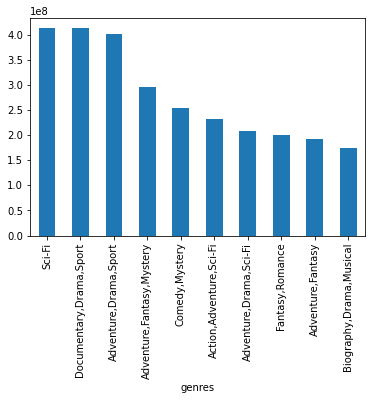

In [72]:
gross_per_genre = imbd_info_df_main_clean1.groupby(['genres'])['domestic_gross'].mean().sort_values(ascending=False)
gross_per_genre.head(10).plot(kind = 'bar')

In [73]:
gross_per_genre.apply(['mean', 'median', 'std', 'max', 'min'])

mean      4.347962e+07
median    2.690981e+07
std       6.164440e+07
max       4.126000e+08
min       8.000000e+02
Name: domestic_gross, dtype: float64

In [58]:
#outlier
gross_per_genre.max()/gross_per_genre.std()

6.693227179938723

In [60]:
#outlier
gross_per_genre.min()/gross_per_genre.std()

1.2977658128819628e-05

In [80]:
totalvote_per_genre = imbd_info_df_main_clean1.groupby(['genres'])['numvotes'].sum()
totalvote_df = totalvote_per_genre.to_frame()
totalrating_per_genre = imbd_info_df_main_clean1.groupby(['genres'])['total_rating'].sum()
totalrating_df = totalrating_per_genre.to_frame()
gross_df= gross_per_genre.to_frame()

In [74]:
weighted_rating = totalrating_df.merge(totalvote_df, on='genres', how='outer')
weighted_rating['weighted_rating']= weighted_rating['total_rating']/weighted_rating['numvotes']
weighted_rating.reset_index()

,genres,total_rating,numvotes,weighted_rating
0,Action,551600.5,96486.0,5.716897
1,"Action,Adventure",60428.6,10084.0,5.992523
2,"Action,Adventure,Animation",24859850.8,3246684.0,7.656997
3,"Action,Adventure,Biography",5960200.2,766392.0,7.776960
4,"Action,Adventure,Comedy",44663008.0,5991675.0,7.454177
...,...,...,...,...
264,"Romance,Sci-Fi,Thriller",1616073.6,227616.0,7.100000
265,"Romance,Thriller",179296.4,29094.0,6.162659
266,Sci-Fi,84.0,20.0,4.200000
267,Thriller,17845.5,3403.0,5.244049


In [83]:
final_df= gross_df.merge(weighted_rating, on= 'genres')
final_df

,domestic_gross,total_rating,numvotes,weighted_rating
genres,,,,
Sci-Fi,412600000.0,84.0,20.0,4.2
"Documentary,Drama,Sport",412600000.0,89.7,13.0,6.9
"Adventure,Drama,Sport",400700000.0,386328.2,62311.0,6.2
"Adventure,Fantasy,Mystery",296000000.0,3276581.0,425530.0,7.7
"Comedy,Mystery",254500000.0,2813200.0,432800.0,6.5
...,...,...,...,...
"Action,Sport,War",18100.0,95.0,19.0,5.0
"Action,Horror,Mystery",5500.0,92850.6,18206.0,5.1
"Comedy,Crime,History",4800.0,114272.2,18431.0,6.2


In [84]:
correlation_dome = final_df.corr()['domestic_gross'].sort_values()
correlation_dome

weighted_rating    0.061760
numvotes           0.278165
total_rating       0.281938
domestic_gross     1.000000
Name: domestic_gross, dtype: float64

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(11,4), ncols=2)
ax1.set_xlim(0, 9), ax1.set_ylim(7, 35)
ax2.set_xlim(-1, 8), ax2.set_ylim(5, 30)
ax1.plot(x1, y1, color='lightblue', linewidth=3, linestyle = '-.')
ax2.scatter(x2, y2, color='red', marker='x')
fig.suptitle("Plots Across Two Subplots", fontsize=24, x=0.44)
fig.legend(labels=["Dataset 1", "Dataset 2"], loc=(.68, .88));
ax1.set_xlabel('variable - x')
ax1.set_ylabel('variable - y')
ax1.set_title ('Left Plot')


## Evaluation

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=counts_wavg_df['wavg_rating'], y=counts_wavg_df['numvotes'])
for i, txt in enumerate(counts_wavg_df['genres']):
    ax.annotate(txt, (counts_wavg_df['wavg_rating'][i], counts_wavg_df['numvotes'][i]))